In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
from scipy import stats
from scipy.stats import shapiro

- Before proceeding for any project/model its very important to understand the data and requirements 
- Data includes COVID-19 cases,vaccination and Lockdown Measures taken such as gathering restrictions,stay home restrictions, etc...
- So, Our Task is to find realtion between daily cases and lockdown measures taken by perform Statistical Analysis and Total EDA 


In [2]:
# Before proceeding for any project/model its very important to understand the data and requirements 
cov = pd.read_csv('India.csv')

In [3]:
cov.tail()

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
774,06-03-2022,42967315.0,0.0,967279389.0,801141086.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775,07-03-2022,42971308.0,0.0,967460932.0,802358408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,08-03-2022,42975883.0,0.0,967725805.0,804228336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,09-03-2022,42980067.0,0.0,967946798.0,805886615.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,10-03-2022,42984261.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# looking at the shape of the dataset
cov.shape

(779, 16)

In [5]:
# to determine Datatype of columns
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 779 non-null    object 
 1   confirmed                            771 non-null    float64
 2   vaccines                             779 non-null    float64
 3   people_vaccinated                    408 non-null    float64
 4   people_fully_vaccinated              379 non-null    float64
 5   school_closing                       773 non-null    float64
 6   workplace_closing                    769 non-null    float64
 7   cancel_events                        769 non-null    float64
 8   gatherings_restrictions              773 non-null    float64
 9   transport_closing                    769 non-null    float64
 10  stay_home_restrictions               769 non-null    float64
 11  internal_movement_restrictions  

In [6]:
# from info we found that every measures column is having 10 null values so, we can simply ignore those vaues but few columns are still having more than 10 null values so need to rectify those
[features for features in cov.columns if cov[features].isnull().sum()>10]

['people_vaccinated', 'people_fully_vaccinated']

In [7]:
cov.head()

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,22-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0


In [8]:
a =['school_closing', 'workplace_closing',
       'cancel_events', 'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'contact_tracing', 'facial_coverings']

In [9]:
# checking the unique values in lockdown measures columns
for x in a:
    b = cov[x].unique()
    print(x)
    print(b)

school_closing
[ 0. -2. -3.  3. -1. nan]
workplace_closing
[ 0.  1. -3.  3.  2. -2. -1. nan]
cancel_events
[ 0.  1. -2.  2. -1. nan]
gatherings_restrictions
[ 0. -4.  4. -2. -3.  2. nan]
transport_closing
[ 0. -2.  2.  1. nan]
stay_home_restrictions
[ 0. -1.  3. -3. -2.  2. nan]
internal_movement_restrictions
[ 0.  1. -2.  2. nan]
international_movement_restrictions
[ 0.  1.  2.  3.  4. nan]
information_campaigns
[ 0.  1.  2. nan]
contact_tracing
[ 0.  1.  2. nan]
facial_coverings
[ 0.  1. -4.  4.  2.  3. nan]


In [10]:
# Many columns were having -1,-2,-3 as notation of different categories instead of 1,2,3 so need to convert that using abs()
cov[a] = cov[a].abs()

In [11]:
# need to determine null values 
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 779 non-null    object 
 1   confirmed                            771 non-null    float64
 2   vaccines                             779 non-null    float64
 3   people_vaccinated                    408 non-null    float64
 4   people_fully_vaccinated              379 non-null    float64
 5   school_closing                       773 non-null    float64
 6   workplace_closing                    769 non-null    float64
 7   cancel_events                        769 non-null    float64
 8   gatherings_restrictions              773 non-null    float64
 9   transport_closing                    769 non-null    float64
 10  stay_home_restrictions               769 non-null    float64
 11  internal_movement_restrictions  

In [12]:
cov.corr().transpose()

,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
confirmed,1.000000,NaN,0.903736,0.778865,-0.023403,-0.055072,0.064943,-0.020274,0.008750,0.182802,0.345703,-0.491238,0.252018,-0.602793,0.165948
vaccines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
people_vaccinated,0.903736,NaN,1.000000,0.934357,-0.232777,-0.349531,-0.387744,-0.565980,0.190308,-0.672046,0.586819,-0.851342,NaN,-0.714433,-0.602696
people_fully_vaccinated,0.778865,NaN,0.934357,1.000000,0.022314,-0.301017,-0.291448,-0.330682,0.105201,-0.522131,0.362060,-0.886430,NaN,-0.485653,-0.751527
school_closing,-0.023403,NaN,-0.232777,0.022314,1.000000,0.673351,0.733622,0.791007,0.493420,0.523646,0.336573,0.567557,0.648783,-0.094615,0.403092
workplace_closing,-0.055072,NaN,-0.349531,-0.301017,0.673351,1.000000,0.740150,0.769561,0.722701,0.543156,0.457889,0.683511,0.502859,-0.195180,0.478567
cancel_events,0.064943,NaN,-0.387744,-0.291448,0.733622,0.740150,1.000000,0.776107,0.499792,0.579071,0.462621,0.707292,0.824645,-0.022236,0.681959
gatherings_restrictions,-0.020274,NaN,-0.565980,-0.330682,0.791007,0.769561,0.776107,1.000000,0.513687,0.663128,0.350871,0.686862,0.643391,-0.034294,0.633997
transport_closing,0.008750,NaN,0.190308,0.105201,0.493420,0.722701,0.499792,0.513687,1.000000,0.146081,0.587717,0.552611,0.315672,-0.379500,0.247393
stay_home_restrictions,0.182802,NaN,-0.672046,-0.522131,0.523646,0.543156,0.579071,0.663128,0.146081,1.000000,0.206809,0.375953,0.549205,0.096183,0.475150


<AxesSubplot:>

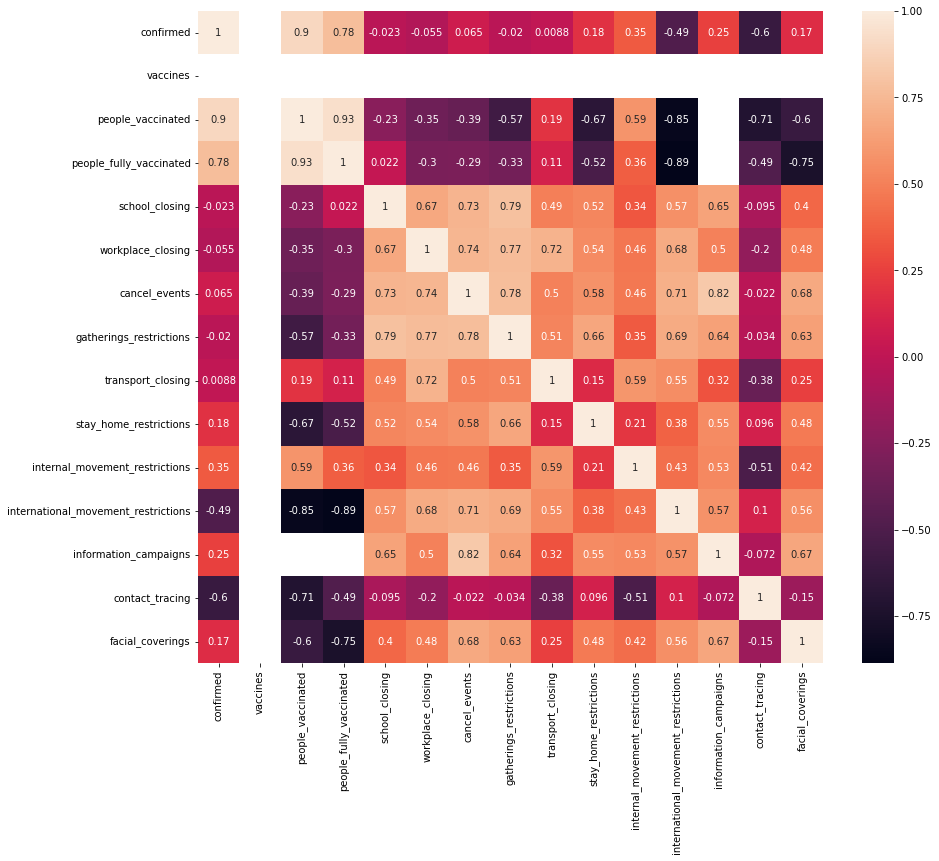

In [13]:
plt.figure(figsize = (14,12))
sns.heatmap(cov.corr(),annot = True)

In [14]:
# change the Datatype of date column to datetime
cov['date'] = pd.to_datetime(cov['date'])

C:\Users\Viren\AppData\Local\Temp\ipykernel_14032\453946647.py:2: UserWarning: Parsing '22-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cov['date'] = pd.to_datetime(cov['date'])
C:\Users\Viren\AppData\Local\Temp\ipykernel_14032\453946647.py:2: UserWarning: Parsing '23-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cov['date'] = pd.to_datetime(cov['date'])
C:\Users\Viren\AppData\Local\Temp\ipykernel_14032\453946647.py:2: UserWarning: Parsing '24-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cov['date'] = pd.to_datetime(cov['date'])
C:\Users\Viren\AppData\Local\Temp\ipykernel_14032\453946647.py:2: UserWarning: Parsing '25-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cov['date'] = pd.to_datetime(cov['date'])
C:\Users\Viren\AppData\Local

In [15]:
# plt.figure(figsize = (12,6))

# var = ['date','daily_cases','school_closing']
# sns.pairplot(cov,vars = var,hue ='school_closing')

In [16]:
# We need to check for the NaN value and handle those accordingly
cov.isna().sum()

date                                     0
confirmed                                8
vaccines                                 0
people_vaccinated                      371
people_fully_vaccinated                400
school_closing                           6
workplace_closing                       10
cancel_events                           10
gatherings_restrictions                  6
transport_closing                       10
stay_home_restrictions                  10
internal_movement_restrictions          10
international_movement_restrictions     10
information_campaigns                   10
contact_tracing                         10
facial_coverings                        10
dtype: int64

In [17]:
# creating the new dataframe with minimum threshold value of 9 so, that we can remove nan rows 
cov_1 = cov.dropna(thresh=9)

In [18]:
cov_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 768
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 769 non-null    datetime64[ns]
 1   confirmed                            761 non-null    float64       
 2   vaccines                             769 non-null    float64       
 3   people_vaccinated                    399 non-null    float64       
 4   people_fully_vaccinated              370 non-null    float64       
 5   school_closing                       769 non-null    float64       
 6   workplace_closing                    769 non-null    float64       
 7   cancel_events                        769 non-null    float64       
 8   gatherings_restrictions              769 non-null    float64       
 9   transport_closing                    769 non-null    float64       
 10  stay_home_rest

In [19]:
cov_1[cov_1['people_vaccinated'].isna()]

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,2020-01-22,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2020-01-26,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,2021-07-18,31144229.0,0.0,NaN,NaN,3.0,3.0,2.0,4.0,2.0,3.0,2.0,3.0,2.0,1.0,4.0
556,2021-07-31,31655824.0,0.0,NaN,NaN,2.0,3.0,2.0,4.0,2.0,2.0,2.0,3.0,2.0,1.0,4.0
558,2021-02-08,31726507.0,0.0,NaN,NaN,2.0,3.0,2.0,4.0,2.0,2.0,2.0,3.0,2.0,1.0,4.0
568,2021-12-08,32117826.0,0.0,NaN,NaN,2.0,3.0,2.0,4.0,2.0,2.0,2.0,3.0,2.0,1.0,4.0


In [20]:
# Still few columns are having null values, so need to rectify those we will use backfill so that null values can be filled wit previous data
# As all are cummulative column
cov_1['people_vaccinated']=cov_1['people_vaccinated'].fillna(method = 'bfill')
cov_1['people_fully_vaccinated']=cov_1['people_fully_vaccinated'].fillna(method = 'bfill')
cov_1['confirmed']=cov_1['confirmed'].fillna(method = 'bfill')

C:\Users\Viren\AppData\Local\Temp\ipykernel_14032\1960749787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov_1['people_vaccinated']=cov_1['people_vaccinated'].fillna(method = 'bfill')
C:\Users\Viren\AppData\Local\Temp\ipykernel_14032\1960749787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov_1['people_fully_vaccinated']=cov_1['people_fully_vaccinated'].fillna(method = 'bfill')
C:\Users\Viren\AppData\Local\Temp\ipykernel_14032\1960749787.py:5: SettingWithCopyWarning: 
A value is trying to be 

In [21]:
# Created new column of Daily Cases so that we can compare the effect of Lockdown measures on it
cov_1['daily_cases'] = cov_1['confirmed'].diff().fillna(cov_1['confirmed'])

C:\Users\Viren\AppData\Local\Temp\ipykernel_14032\3820625752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov_1['daily_cases'] = cov_1['confirmed'].diff().fillna(cov_1['confirmed'])


In [22]:
cov_1.describe()

,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings,daily_cases
count,7.690000e+02,769.0,7.690000e+02,7.690000e+02,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,1.646299e+07,0.0,2.345384e+08,1.216880e+08,2.418726,2.098830,1.806242,3.297789,1.200260,2.227568,1.612484,2.962289,1.940182,1.433030,3.456437,55827.106632
std,1.452621e+07,0.0,3.296933e+08,2.154346e+08,0.881797,0.987216,0.518072,1.212353,0.899334,0.594216,0.718542,0.871949,0.253230,0.506213,1.227289,82189.748239
min,1.000000e+00,0.0,0.000000e+00,7.668000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750723e+06,0.0,0.000000e+00,7.668000e+03,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,4.000000,10549.000000
50%,1.085837e+07,0.0,6.611561e+06,7.668000e+03,3.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,4.000000,28326.000000
75%,3.239329e+07,0.0,4.461022e+08,1.271033e+08,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000,57711.000000
max,4.293104e+07,0.0,9.657336e+08,7.905563e+08,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000,414188.000000


In [23]:
cov_1

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings,daily_cases
0,2020-01-22,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2020-01-23,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2020-01-26,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,2022-02-24,42894345.0,0.0,964304634.0,782222068.0,3.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,13166.0
765,2022-02-25,42905844.0,0.0,964818498.0,785172630.0,3.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,11499.0
766,2022-02-26,42916117.0,0.0,965336168.0,788213991.0,3.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,10273.0
767,2022-02-27,42924130.0,0.0,965531308.0,789372639.0,3.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,8013.0


C:\Users\Viren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily_cases', ylabel='Density'>

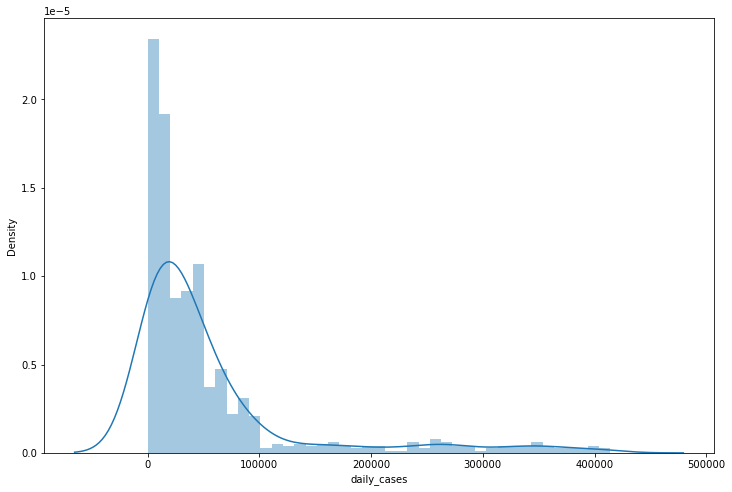

In [24]:
plt.figure(figsize = (12,8))
sns.distplot(cov_1['daily_cases'])

In [25]:
# Here definitely the data is not normal, and we can see many outliers but here in this case we cannot neglect any data

In [26]:
cols = list(enumerate(cov_1.columns))
cols

[(0, 'date'),
 (1, 'confirmed'),
 (2, 'vaccines'),
 (3, 'people_vaccinated'),
 (4, 'people_fully_vaccinated'),
 (5, 'school_closing'),
 (6, 'workplace_closing'),
 (7, 'cancel_events'),
 (8, 'gatherings_restrictions'),
 (9, 'transport_closing'),
 (10, 'stay_home_restrictions'),
 (11, 'internal_movement_restrictions'),
 (12, 'international_movement_restrictions'),
 (13, 'information_campaigns'),
 (14, 'contact_tracing'),
 (15, 'facial_coverings'),
 (16, 'daily_cases')]

<Figure size 1440x4320 with 0 Axes>

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


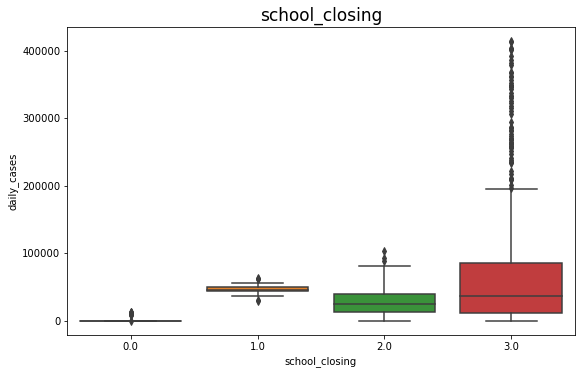

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


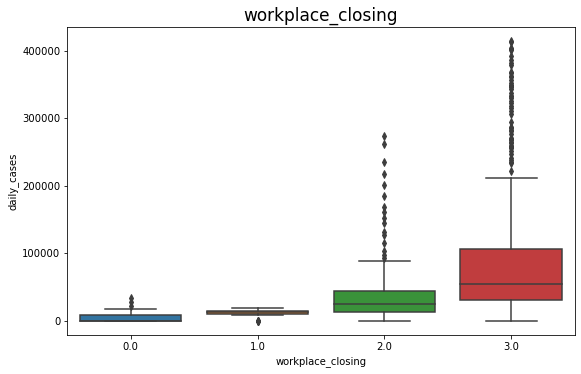

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


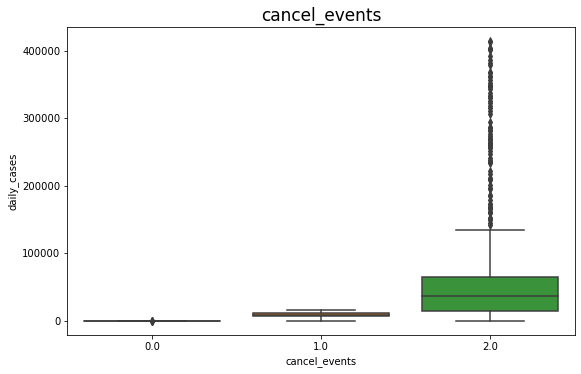

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


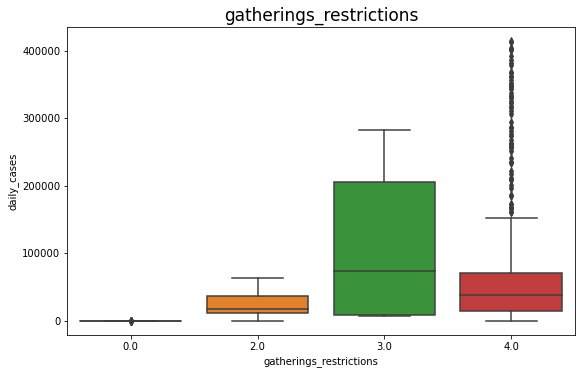

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


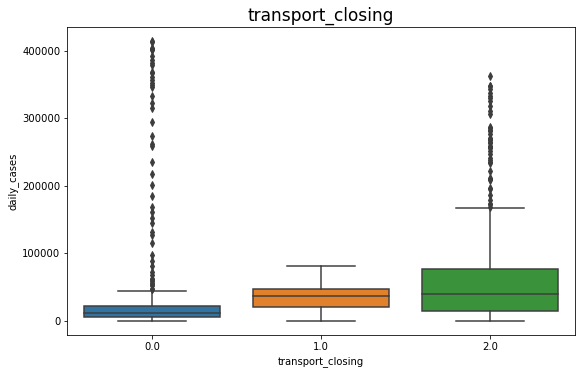

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


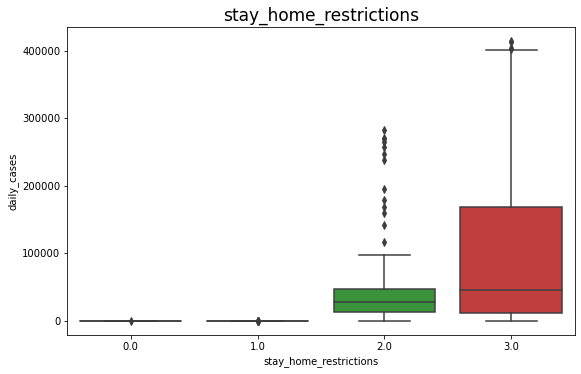

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


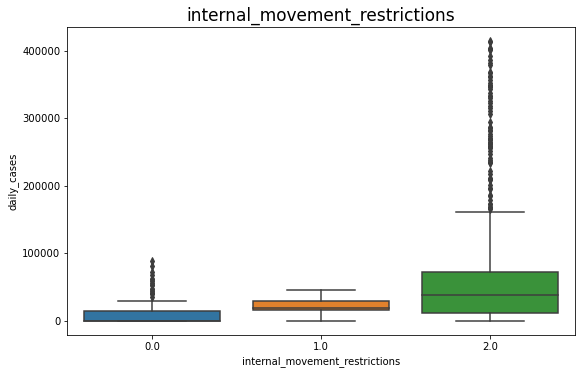

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


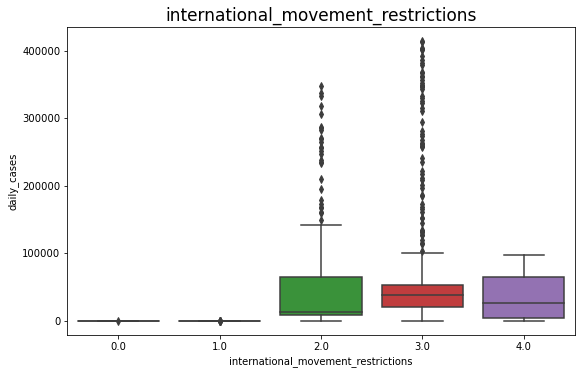

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


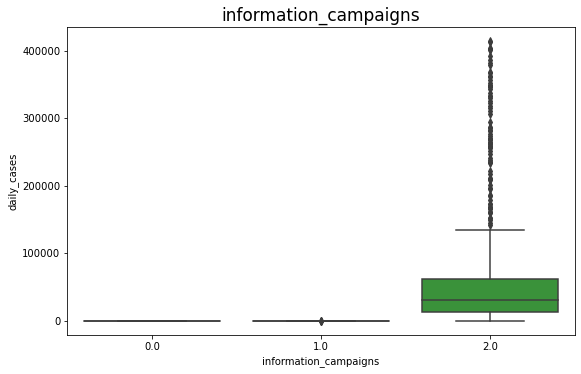

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


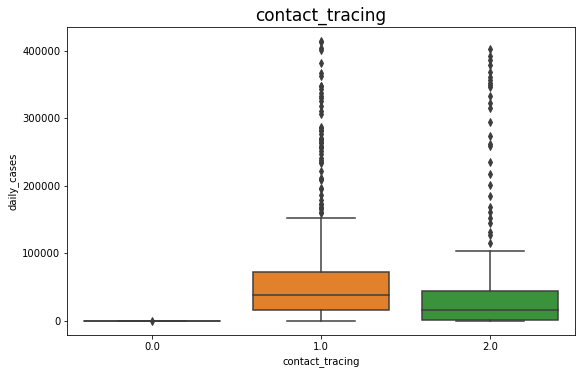

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


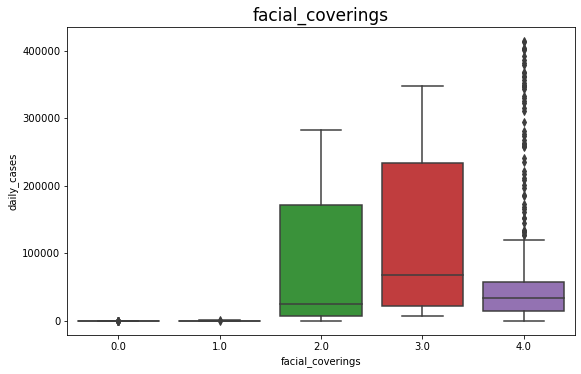

In [27]:
plt.figure(figsize=(20, 60))
for n, col in cols:
    if col in ['date','confirmed','vaccines','people_vaccinated','people_fully_vaccinated','daily_cases']:
        pass
    else :
        plt.figure(figsize=(20, 60))
        plt.subplot(9,2,n)
        sns.boxplot(cov_1[col],cov_1['daily_cases'])
        plt.title(col,fontsize=17)
    plt.show()

In [28]:
import scipy.stats as stats
import math

Now we want to determine if Lockdown measures taken are affecting the daily cases or not.

So, we will have to perform hyposthesis test to check that

 Steps for performing hypothesis testing.
 1. set up Null Hypothesis (H0)
 2. State the alternate hypothesis (H1)
 3. Set a significance level (alpha)
 4. Calculate test Statistics.
 5. Decision to accept or reject null hypothesis.


# H0:- mean of daily cases before application of lockdown measure is high or equal to mean of daily cases after application of lockdown measure

# Ha:- mean of daily cases before application of lockdown measure is less from the mean of daily cases after application of lockdown measure

# Alpha = 0.05

In [29]:
cov_1.groupby('school_closing')['daily_cases'].describe()

,count,mean,std,min,25%,50%,75%,max
school_closing,,,,,,,,
0.0,56.0,2532.428571,4687.689960,0.0,0.0,0.0,7.25,13091.0
1.0,37.0,47121.621622,7573.301259,29163.0,44684.0,46253.0,50210.00,63371.0
2.0,205.0,28337.975610,21079.289438,0.0,12514.0,24354.0,40134.00,103558.0
3.0,471.0,74811.983015,99011.169917,0.0,12168.5,36604.0,85869.50,414188.0


C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'school_closing')

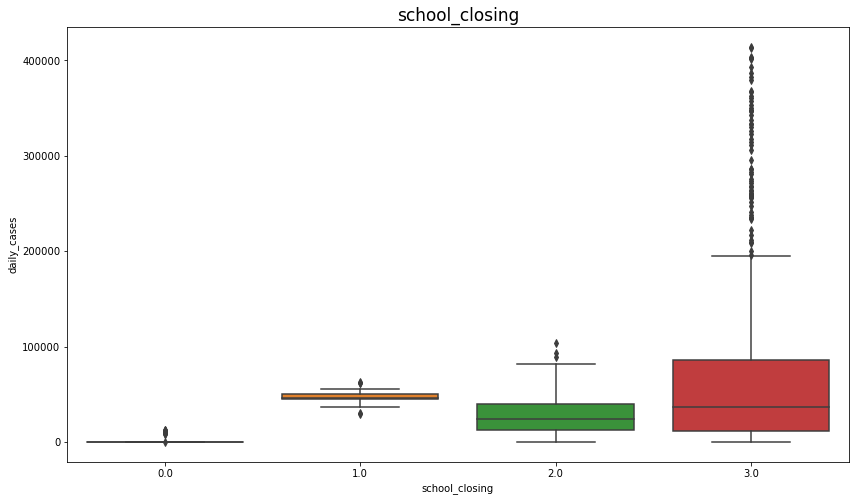

In [30]:
plt.figure(figsize = (14,8))
sns.boxplot(cov_1['school_closing'],cov_1['daily_cases'])
plt.title('school_closing',fontsize=17)

In [31]:
# we clearly see that mean of all 4 catgory are different but we will use one-way anova to test whether this difference in mean
# is statistically significant or not.

In [32]:
cov_s0 = cov_1[cov_1['school_closing']==0]['daily_cases']
cov_s1 = cov_1[cov_1['school_closing']==1]['daily_cases']
cov_s2 = cov_1[cov_1['school_closing']==2]['daily_cases']
cov_s3 = cov_1[cov_1['school_closing']==3]['daily_cases']

In [33]:
alpha = 0.05
Stats,p_value = stats.f_oneway(cov_s0,
                              cov_s1,
                              cov_s2,
                              cov_s3)

if p_value > alpha :
    print(f' Failed to reject null hypothesis \n school_closing have no impact on Daily Cases \n p-value : {p_value}')
    
else:
    print(f' Reject null hypothesis \n school_closing have impact on Daily Cases  \n p-value : {p_value}')

 Reject null hypothesis 
 school_closing have impact on Daily Cases  
 p-value : 3.001471465254214e-16


- Here our p-value is less than alpha. Which means that the school_closing have impact on Daily Cases.
- Using one way anova we only know that the Means of the groups are not same. But we don't know which group mean are not same.
- We use post-hoc test to find out which group mean are not equal.
- But one more thing to add into this is that we have't checked the assumptions of Anova test so, we need to check those too.

# Tukey HSD Post-Hoc-Test

In [34]:
#Use TukeyHSD to know which group mean are not similar.

In [35]:
from statsmodels.stats.multicomp import MultiComparison
mul_comp = MultiComparison(cov_1['daily_cases'],cov_1['school_closing'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2  meandiff  p-adj     lower       upper    reject
--------------------------------------------------------------
   0.0    1.0 44589.1931 0.0372   1827.4741   87350.912   True
   0.0    2.0  25805.547 0.1288  -4628.3709   56239.465  False
   0.0    3.0 72279.5544    0.0  43749.0535 100810.0553   True
   1.0    2.0 -18783.646 0.5368 -54836.4001  17269.1081  False
   1.0    3.0 27690.3614 0.1643  -6770.7355  62151.4583  False
   2.0    3.0 46474.0074    0.0  29585.3736  63362.6412   True
--------------------------------------------------------------


In [36]:
# If you look at the last column. some are True and Some are False, which few categories have same mean, and few don't
# Wherein category 2 have mean of daily cases same as mean of daily cases before application of lockdown measure

                            OLS Regression Results                            
Dep. Variable:            daily_cases   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     62.10
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           1.12e-14
Time:                        18:39:13   Log-Likelihood:                -9763.3
No. Observations:                 769   AIC:                         1.953e+04
Df Residuals:                     767   BIC:                         1.954e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5871.2140   8332.928     -0.

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2  meandiff  p-adj     lower       upper    reject
--------------------------------------------------------------
   0.0    1.0 44589.1931 0.0372   1827.4741   87350.912   True
   0.0    2.0  25805.547 0.1288  -4628.3709   56239.465  False
   0.0    3.0 72279.5544    0.0  43749.0535 100810.0553   True
   1.0    2.0 -18783.646 0.5368 -54836.4001  17269.1081  False
   1.0    3.0 27690.3614 0.1643  -6770.7355  62151.4583  False
   2.0    3.0 46474.0074    0.0  29585.3736  63362.6412   True
--------------------------------------------------------------


,df,sum_sq,mean_sq,F,PR(>F)
school_closing,1.0,3.885722e+11,3.885722e+11,62.098533,1.119469e-14
Residual,767.0,4.799387e+12,6.257349e+09,NaN,NaN


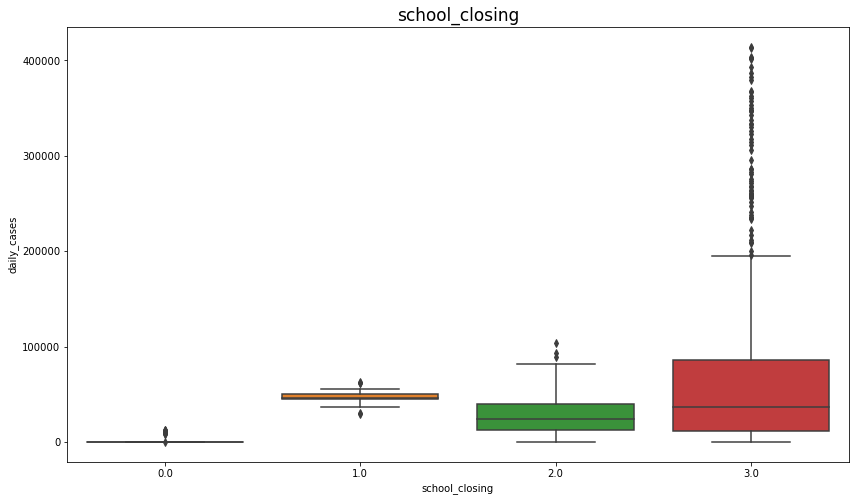

In [37]:
ano = ols('daily_cases~school_closing',data = cov_1).fit()
one = sm.stats.anova_lm(ano,type=2)

plt.figure(figsize = (14,8))
sns.boxplot(cov_1['school_closing'],cov_1['daily_cases'])
plt.title('school_closing',fontsize=17)
print(ano.summary())

print(cov_1.groupby('school_closing')['daily_cases'].describe())


from statsmodels.stats.multicomp import MultiComparison
mul_comp = MultiComparison(cov_1['daily_cases'],cov_1['school_closing'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

one

In [38]:
# as per the above result we can consider that p value is very less so mean after school closing is definitely high or equal
# so we cannot say that school closing was significant in reducing cases.

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:            daily_cases   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     154.6
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           1.83e-32
Time:                        18:39:14   Log-Likelihood:                -9722.7
No. Observations:                 769   AIC:                         1.945e+04
Df Residuals:                     767   BIC:                         1.946e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.574e+04   6360.09

,df,sum_sq,mean_sq,F,PR(>F)
workplace_closing,1.0,8.702397e+11,8.702397e+11,154.589463,1.833208e-32
Residual,767.0,4.317719e+12,5.629360e+09,NaN,NaN


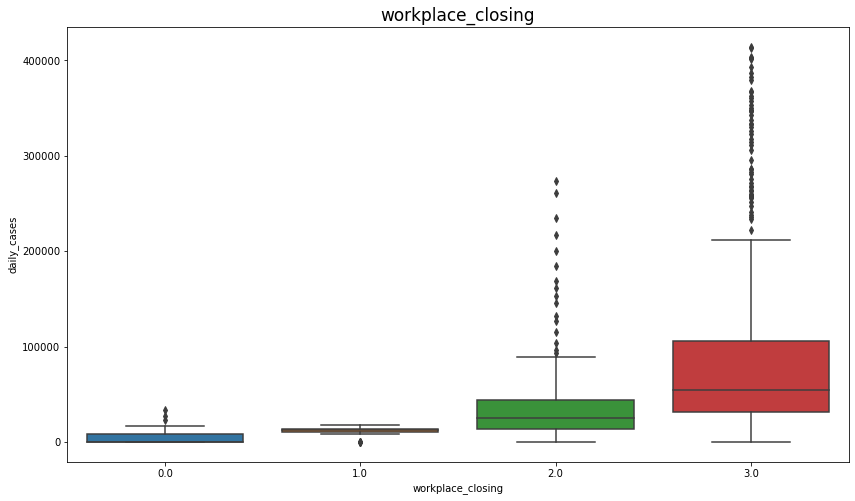

In [39]:
ano = ols('daily_cases~workplace_closing',data = cov_1).fit()
one = sm.stats.anova_lm(ano,type=2)

plt.figure(figsize = (14,8))
sns.boxplot(cov_1['workplace_closing'],cov_1['daily_cases'])
plt.title('workplace_closing',fontsize=17)

print(ano.summary())

mul_comp = MultiComparison(cov_1['daily_cases'],cov_1['workplace_closing'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

print(cov_1.groupby('workplace_closing')['daily_cases'].describe())

one

In [40]:
# as per the above result we can consider that p value is very less so mean after workplace_closing is definitely high or equal
# so we cannot say that workplace_closing was significant in reducing cases.

# Using post hoc test we got to know that group 1 was significant in reducing cases.

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:            daily_cases   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     45.97
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           2.40e-11
Time:                        18:39:15   Log-Likelihood:                -9770.9
No. Observations:                 769   AIC:                         1.955e+04
Df Residuals:                     767   BIC:                         1.956e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.231e+04   1.05e+04     -1.178

,df,sum_sq,mean_sq,F,PR(>F)
cancel_events,1.0,2.933375e+11,2.933375e+11,45.966748,2.400845e-11
Residual,767.0,4.894621e+12,6.381514e+09,NaN,NaN


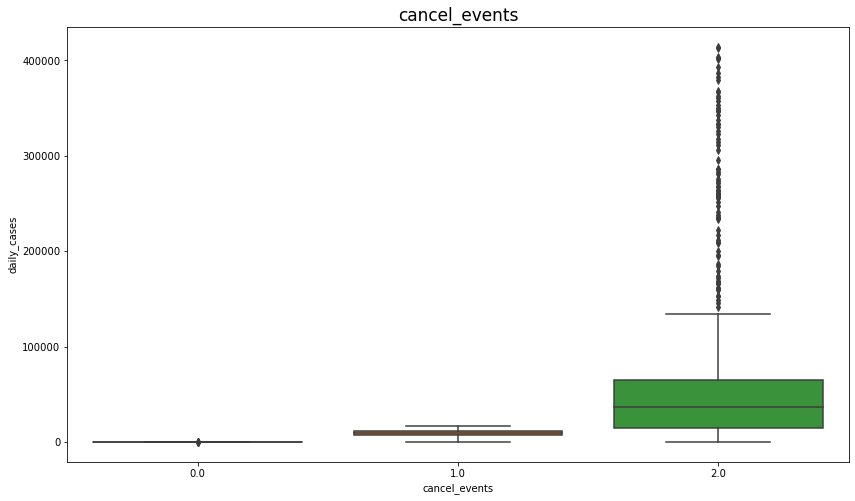

In [41]:
ano = ols('daily_cases~cancel_events',data = cov_1).fit()
one = sm.stats.anova_lm(ano,type=2)

plt.figure(figsize = (14,8))
sns.boxplot(cov_1['cancel_events'],cov_1['daily_cases'])
plt.title('cancel_events',fontsize=17)
print(ano.summary())

print(cov_1.groupby('cancel_events')['daily_cases'].describe())

mul_comp = MultiComparison(cov_1['daily_cases'],cov_1['cancel_events'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

one

In [42]:
# as per the above result we can consider that p value is very less so mean after cancel_events is definitely high or equal
# so we cannot say that cancel_events was significant in reducing cases.


C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:            daily_cases   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     57.39
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           1.03e-13
Time:                        18:39:15   Log-Likelihood:                -9765.5
No. Observations:                 769   AIC:                         1.954e+04
Df Residuals:                     767   BIC:                         1.954e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -3

,df,sum_sq,mean_sq,F,PR(>F)
gatherings_restrictions,1.0,3.611314e+11,3.611314e+11,57.385062,1.032627e-13
Residual,767.0,4.826827e+12,6.293126e+09,NaN,NaN


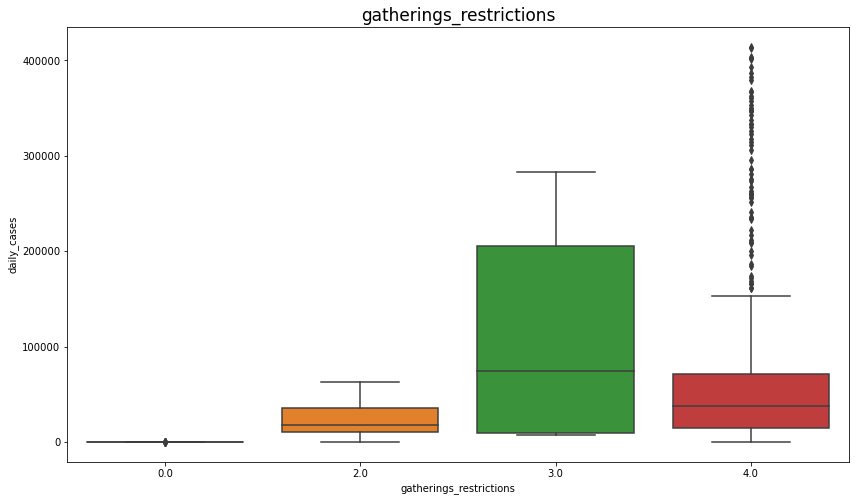

In [43]:
ano = ols('daily_cases~gatherings_restrictions',data = cov_1).fit()
one = sm.stats.anova_lm(ano,type=2)

plt.figure(figsize = (14,8))
sns.boxplot(cov_1['gatherings_restrictions'],cov_1['daily_cases'])
plt.title('gatherings_restrictions',fontsize=17)
print(ano.summary())

print(cov_1.groupby('gatherings_restrictions')['daily_cases'].describe())

mul_comp = MultiComparison(cov_1['daily_cases'],cov_1['gatherings_restrictions'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

one

In [44]:
# as per the above result we can consider that p value is very less so mean after gatherings_restrictions is definitely high or equal
# so we cannot say that gatherings_restrictions was significant in reducing cases.

# Here using post hoc test we found that group 2 was kind of significant in reducing the cases

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:            daily_cases   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.404
Date:                Sat, 10 Sep 2022   Prob (F-statistic):             0.0362
Time:                        18:39:16   Log-Likelihood:                -9791.1
No. Observations:                 769   AIC:                         1.959e+04
Df Residuals:                     767   BIC:                         1.960e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.754e+04   4933.89

,df,sum_sq,mean_sq,F,PR(>F)
transport_closing,1.0,2.961709e+10,2.961709e+10,4.4038,0.036185
Residual,767.0,5.158342e+12,6.725348e+09,NaN,NaN


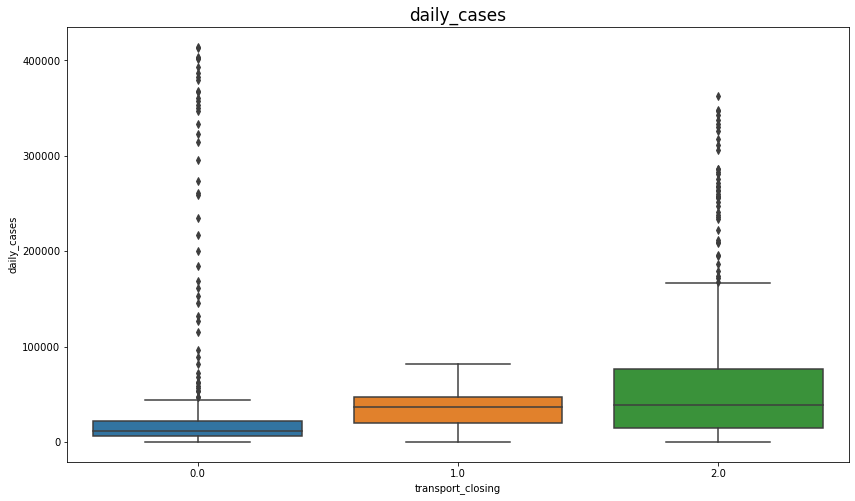

In [45]:
ano = ols('daily_cases~transport_closing',data = cov_1).fit()
one = sm.stats.anova_lm(ano,type=2)

plt.figure(figsize = (14,8))
sns.boxplot(cov_1['transport_closing'],cov_1['daily_cases'])
plt.title(col,fontsize=17)
print(ano.summary())

print(cov_1.groupby('transport_closing')['daily_cases'].describe())


mul_comp = MultiComparison(cov_1['daily_cases'],cov_1['transport_closing'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)


one

In [46]:
# as per the above result we can consider that p value is very less so mean after transport_closing is definitely high or equal
# so we cannot say that transport_closing was significant in reducing cases.

# Here using post hoc test we found that group 1 was kind of significant in reducing the cases

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:            daily_cases   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     151.9
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           5.66e-32
Time:                        18:39:16   Log-Likelihood:                -9723.8
No. Observations:                 769   AIC:                         1.945e+04
Df Residuals:                     767   BIC:                         1.946e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -6.94

,df,sum_sq,mean_sq,F,PR(>F)
stay_home_restrictions,1.0,8.576052e+11,8.576052e+11,151.900572,5.662301e-32
Residual,767.0,4.330354e+12,5.645833e+09,NaN,NaN


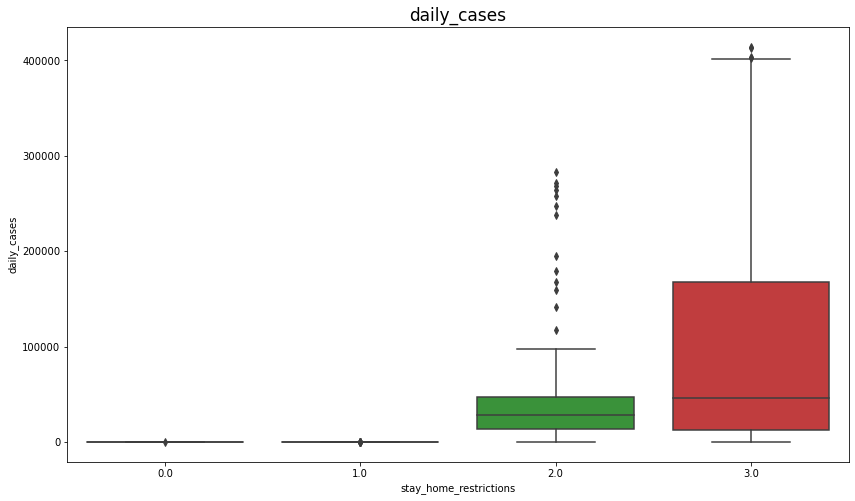

In [47]:
ano = ols('daily_cases~stay_home_restrictions',data = cov_1).fit()
one = sm.stats.anova_lm(ano,type=2)

plt.figure(figsize = (14,8))
sns.boxplot(cov_1['stay_home_restrictions'],cov_1['daily_cases'])
plt.title(col,fontsize=17)
print(ano.summary())

print(cov_1.groupby('stay_home_restrictions')['daily_cases'].describe())

mul_comp = MultiComparison(cov_1['daily_cases'],cov_1['stay_home_restrictions'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

one

In [48]:
# as per the above result we can consider that p value is very less so mean after stay_home_restrictions is definitely high or equal
# so we cannot say that stay_home_restrictions was significant in reducing cases.

# Here count of 0 and 1 group was very less so we cannot take them into consideration

                            OLS Regression Results                            
Dep. Variable:            daily_cases   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     55.75
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           2.24e-13
Time:                        18:39:17   Log-Likelihood:                -9766.3
No. Observations:                 769   AIC:                         1.954e+04
Df Residuals:                     767   BIC:                         1.955e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                                count          mean           std  min  \
internal_movement_restrictions                                           
0.0                             107.0  13908.747664  20720.374656  0.0   
1.0                              84.0  22066.916667  10910.662048  0.0   
2.0                             578.0  68493.404844  90789.751222  0.0   

                                     25%      50%       75%       max  
internal_movement_restrictions                                         
0.0                                 0.00     23.0  14231.50   89129.0  
1.0                             15479.50  18916.5  29537.50   45209.0  
2.0                             12053.75  38647.5  72966.25  414188.0  
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
   0.0    1.0   8158.169 0.7599 -18972.3725 35288.7105  False
   0.0    2.0 54584.6

,df,sum_sq,mean_sq,F,PR(>F)
internal_movement_restrictions,1.0,3.515350e+11,3.515350e+11,55.749325,2.240716e-13
Residual,767.0,4.836424e+12,6.305637e+09,NaN,NaN


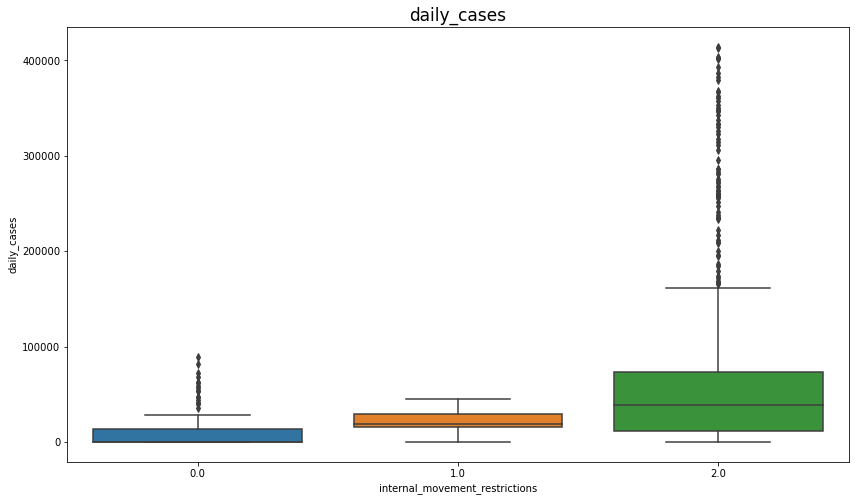

In [49]:
ano = ols('daily_cases~internal_movement_restrictions',data = cov_1).fit()
one = sm.stats.anova_lm(ano,type=2)

plt.figure(figsize = (14,8))
sns.boxplot(cov_1['internal_movement_restrictions'],cov_1['daily_cases'])
plt.title(col,fontsize=17)
print(ano.summary())

print(cov_1.groupby('internal_movement_restrictions')['daily_cases'].describe())


mul_comp = MultiComparison(cov_1['daily_cases'],cov_1['internal_movement_restrictions'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

one

In [50]:
# as per the above result we can consider that p value is very less so mean after internal_movement_restrictions is definitely high or equal
# so we cannot say that internal_movement_restrictions was significant in reducing cases.

# Here using post hoc test we found that group 1 was kind of significant in reducing the cases

                            OLS Regression Results                            
Dep. Variable:            daily_cases   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.09727
Date:                Sat, 10 Sep 2022   Prob (F-statistic):              0.755
Time:                        18:39:17   Log-Likelihood:                -9793.2
No. Observations:                 769   AIC:                         1.959e+04
Df Residuals:                     767   BIC:                         1.960e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                                     count          mean           std   min  \
international_movement_restrictions                                            
0.0                                    4.0      0.250000      0.500000   0.0   
1.0                                   47.0      1.531915      4.185124   0.0   
2.0                                  142.0  62994.042254  94422.667558   0.0   
3.0                                  357.0  72940.389356  96964.163123   0.0   
4.0                                  219.0  36283.557078  32431.210145  24.0   

                                          25%      50%       75%       max  
international_movement_restrictions                                         
0.0                                      0.00      0.0      0.25       1.0  
1.0                                      0.00      0.0      0.50      23.0  
2.0                                   9200.25  13620.0  64837.25  347254.0  
3.0                                  21257.00  38310.0

,df,sum_sq,mean_sq,F,PR(>F)
international_movement_restrictions,1.0,6.578663e+08,6.578663e+08,0.097273,0.755212
Residual,767.0,5.187301e+12,6.763104e+09,NaN,NaN


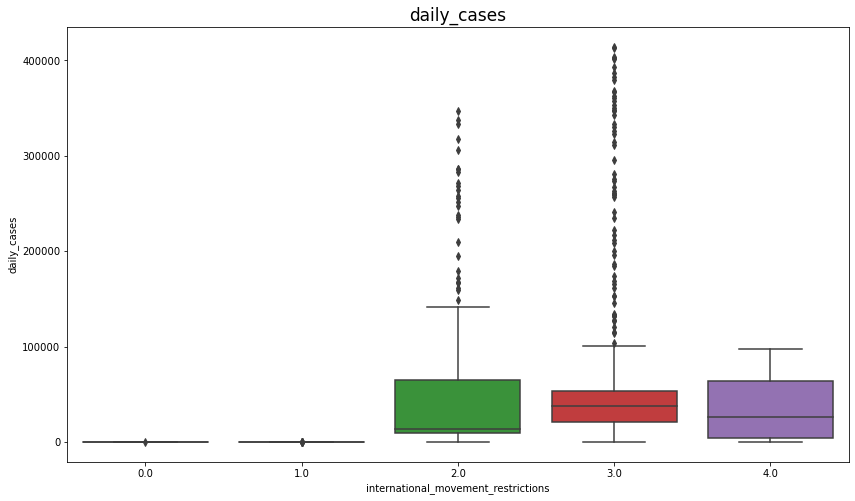

In [51]:
ano = ols('daily_cases~international_movement_restrictions',data = cov_1).fit()
one = sm.stats.anova_lm(ano,type=2)

plt.figure(figsize = (14,8))
sns.boxplot(cov_1['international_movement_restrictions'],cov_1['daily_cases'])
plt.title(col,fontsize=17)
print(ano.summary())

print(cov_1.groupby('international_movement_restrictions')['daily_cases'].describe())


mul_comp = MultiComparison(cov_1['daily_cases'],cov_1['international_movement_restrictions'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

one

In [52]:
# as per the above result we can consider that p value higher than 0.5 so mean after international_movement_restrictions is  
# definitely less the mean before application so we can say that international_movement_restrictions was significant in reducing cases.

# Here using post hoc test we found that group 0 and 1 were having very less counts so we cannot take those into consideration

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:            daily_cases   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     20.32
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           7.57e-06
Time:                        18:39:18   Log-Likelihood:                -9783.2
No. Observations:                 769   AIC:                         1.957e+04
Df Residuals:                     767   BIC:                         1.958e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -4.534e+

,df,sum_sq,mean_sq,F,PR(>F)
information_campaigns,1.0,1.339073e+11,1.339073e+11,20.321693,0.000008
Residual,767.0,5.054052e+12,6.589376e+09,NaN,NaN


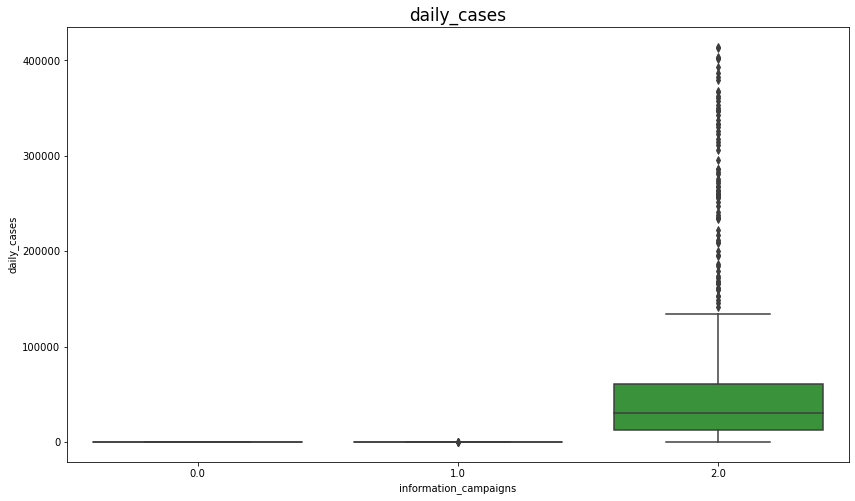

In [53]:
ano = ols('daily_cases~information_campaigns',data = cov_1).fit()
one = sm.stats.anova_lm(ano,type=2)

plt.figure(figsize = (14,8))
sns.boxplot(cov_1['information_campaigns'],cov_1['daily_cases'])
plt.title(col,fontsize=17)

print(ano.summary())

print(cov_1.groupby('information_campaigns')['daily_cases'].describe())


mul_comp = MultiComparison(cov_1['daily_cases'],cov_1['information_campaigns'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)
one

In [54]:
# as per the above result we can consider that p value is very less so mean after information_campaigns is definitely high or equal
# so we cannot say that information_campaigns was significant in reducing cases.


C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:            daily_cases   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     15.03
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           0.000115
Time:                        18:39:19   Log-Likelihood:                -9785.8
No. Observations:                 769   AIC:                         1.958e+04
Df Residuals:                     767   BIC:                         1.958e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8.808e+04   8823.310     

,df,sum_sq,mean_sq,F,PR(>F)
contact_tracing,1.0,9.970016e+10,9.970016e+10,15.028721,0.000115
Residual,767.0,5.088259e+12,6.633975e+09,NaN,NaN


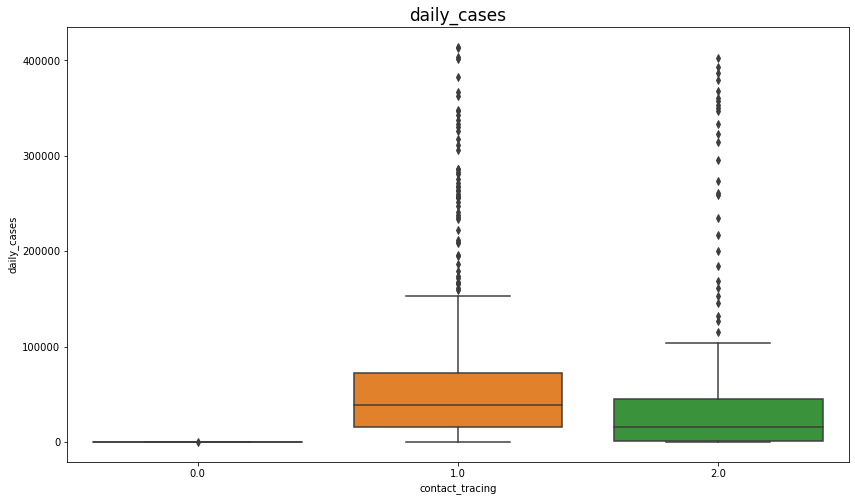

In [55]:
ano = ols('daily_cases~contact_tracing',data = cov_1).fit()
one = sm.stats.anova_lm(ano,type=2)

plt.figure(figsize = (14,8))
sns.boxplot(cov_1['contact_tracing'],cov_1['daily_cases'])
plt.title(col,fontsize=17)
print(ano.summary())

print(cov_1.groupby('contact_tracing')['daily_cases'].describe())


mul_comp = MultiComparison(cov_1['daily_cases'],cov_1['contact_tracing'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

one

In [56]:
# as per the above result we can consider that p value is very less so mean after contact_tracing is definitely high or equal
# so we cannot say that contact_tracing was significant in reducing cases.


C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:            daily_cases   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     18.51
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           1.91e-05
Time:                        18:39:19   Log-Likelihood:                -9784.1
No. Observations:                 769   AIC:                         1.957e+04
Df Residuals:                     767   BIC:                         1.958e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          2.03e+04   8763.487  

,df,sum_sq,mean_sq,F,PR(>F)
facial_coverings,1.0,1.222309e+11,1.222309e+11,18.506936,0.000019
Residual,767.0,5.065728e+12,6.604600e+09,NaN,NaN


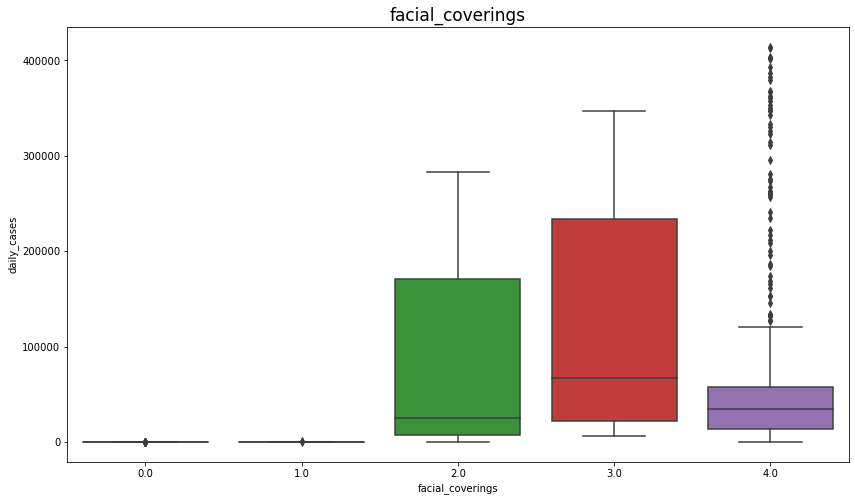

In [57]:
ano = ols('daily_cases~facial_coverings',data = cov_1).fit()
one = sm.stats.anova_lm(ano,type=2)

plt.figure(figsize = (14,8))
sns.boxplot(cov_1['facial_coverings'],cov_1['daily_cases'])
plt.title('facial_coverings',fontsize=17)
print(ano.summary())

print(cov_1.groupby('facial_coverings')['daily_cases'].describe())


mul_comp = MultiComparison(cov_1['daily_cases'],cov_1['facial_coverings'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

one

In [58]:
# as per the above result we can consider that p value is very less so mean after facial_coverings is definitely high or equal
# so we cannot say that facial_coverings was significant in reducing cases.


<AxesSubplot:>

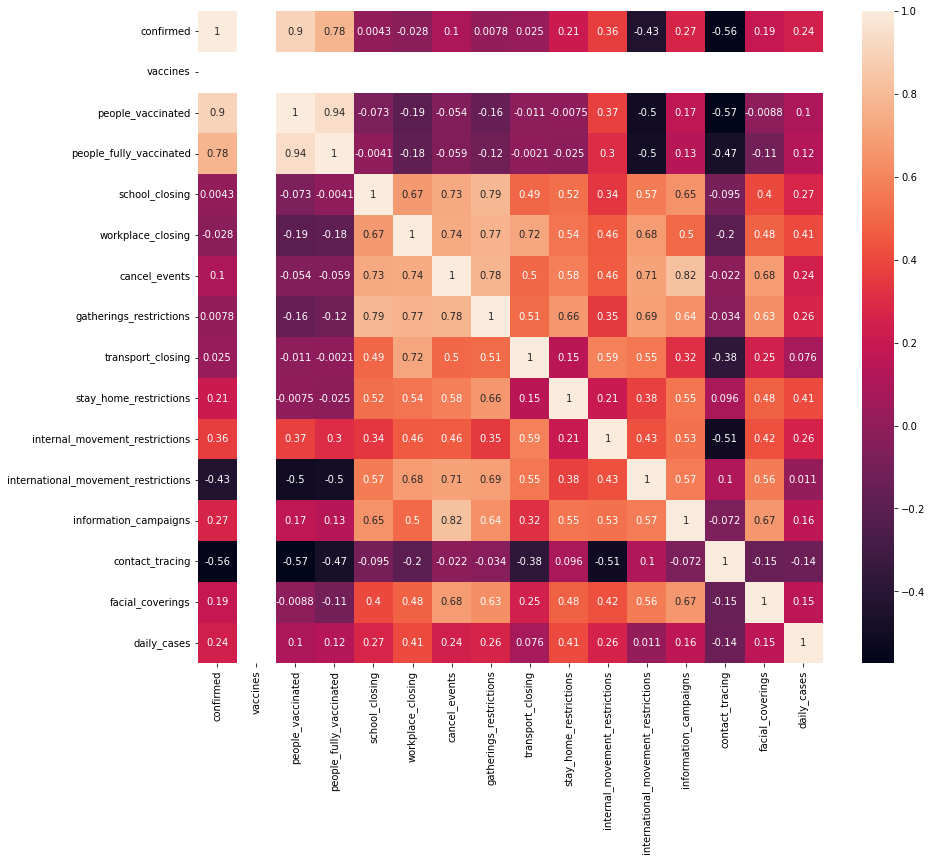

In [59]:
plt.figure(figsize = (14,12))
sns.heatmap(cov_1.corr(),annot = True)

In [60]:
# Again from this coorelation chart we found that other than contact tracing all other are positive which tells us that contact tracing was significant in reducing the daily cases